# Gradient Descent 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.random.seed(42)

## Reading and plotting the data

In [2]:
data = pd.read_csv('gd_data.csv', header=None)
X = np.array(data.iloc[:,:2])
y = np.array(data.iloc[:,-1])

In [3]:
(X.shape, y.shape)

((100, 2), (100,))

## TODO: Complete the implementation


Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

In [22]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

Prediction function

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

In [23]:
# use np.dot() to multiply features and weights, we will talk about 
# that function later but you can think of it as multiplication for now

def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights)+bias)

Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

In [24]:
def error_formula(y, output):
    return (-y*np.log(output))-((1-y)*np.log(1-output))

The function that updates the weights

$$ w_i \longrightarrow w_i - \alpha (-(y - \hat{y})) x_i$$

$$ b \longrightarrow b - \alpha (-(y - \hat{y})) $$

In [28]:
def update_weights(x, y, weights, bias, learnrate):
    weights = weights - (learnrate * (-(y-output_formula(x, weights, bias)))*x)
    bias = bias - learnrate * (-(y-output_formula(x, weights, bias)))
    return weights,bias

## Training

In [29]:
epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate):
    
    errors = []
    _, n_features = features.shape
    weights = np.random.normal(size=n_features)
    bias = 0

    for e in range(epochs):
        for x, y in zip(features, targets):
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        
        if e % (epochs / 10) == 0:
            print("\n================ Epoch", e,"================")
            print("Train loss: ", loss)
            
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
            

    # Error plot
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()


================ Epoch 0 ================
Train loss:  0.6874447546808865
Accuracy:  0.58

================ Epoch 10 ================
Train loss:  0.6064193046706267
Accuracy:  0.6

================ Epoch 20 ================
Train loss:  0.5421243605033897
Accuracy:  0.77

================ Epoch 30 ================
Train loss:  0.4915191679509609
Accuracy:  0.86

================ Epoch 40 ================
Train loss:  0.4512516917606754
Accuracy:  0.89

================ Epoch 50 ================
Train loss:  0.41869059990862356
Accuracy:  0.93

================ Epoch 60 ================
Train loss:  0.391941045585177
Accuracy:  0.92

================ Epoch 70 ================
Train loss:  0.36963983340345297
Accuracy:  0.92

================ Epoch 80 ================
Train loss:  0.3507971714958144
Accuracy:  0.94

================ Epoch 90 ================
Train loss:  0.3346848794176265
Accuracy:  0.94


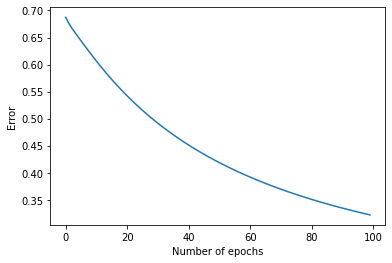

In [30]:
train(X, y, epochs, learnrate)